In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
from pandas import Series

In [6]:
f = pyfits.open('ktwo200147361-c112_lpd-targ.fits')

In [7]:
# get subset of good quality frames
good_frames = f[1].data['QUALITY'] == 0

In [9]:
print("We got {} good frames out of {} in this tpf.".format(good_frames.sum(), len(f[1].data['FLUX'])))

We got 2023 good frames out of 2336 in this tpf.


In [11]:
# Using the quality==0 frames, let's create a flux + flux_bkg time series 
flux_plus_bkg = f[1].data['FLUX'][good_frames] + f[1].data['FLUX_BKG'][good_frames]

In [68]:
# check for pixels with negative flux values
# badpixels is a N x 3 matrix that contains frame number, y, x coordinates, respectivelly
badpixels = np.argwhere(flux_plus_bkg < 0)
badpixels

array([[   0,    0,    8],
       [   0,    0,   10],
       [   0,    1,    8],
       ..., 
       [2022,    9,   10],
       [2022,   10,    8],
       [2022,   10,   10]])

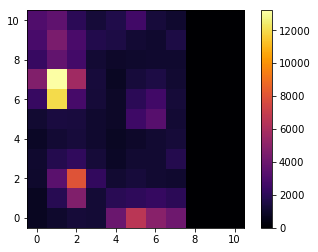

In [69]:
# let's pick one of those frames too see what might be going on
badframe = flux_plus_bkg[badpixels[0, 0]]
plt.imshow(badframe, cmap='inferno', origin='lower', interpolation='nearest')
plt.colorbar()
#badpixels_in_badframe = badframe < 0
#badframe[badpixels_in_badframe]

In [75]:
# Let's see how "negative" those pixels are
np.mean(flux_plus_bkg[flux_plus_bkg < 0])

-3.0896845

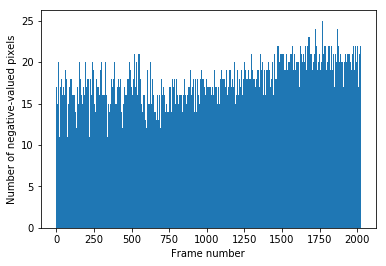

In [118]:
# Let's check where is the distribution of bad pixels
badframes = badpixels[:, 0]
plt.hist(badframes, bins=good_frames.sum(), align='left')
plt.ylabel('Number of negative-valued pixels')
plt.xlabel('Frame number')

Looks like there are roughly 17 negative-valued pixels on almost every frame

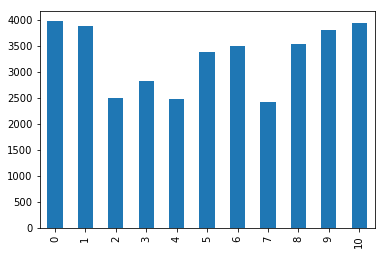

In [114]:
bad_y = Series(badpixels[:, 1])
bad_y_counts = bad_y.value_counts().sort_index()
bad_y_counts.plot(kind='bar')

Bad pixels appering uniformly along the y-axis

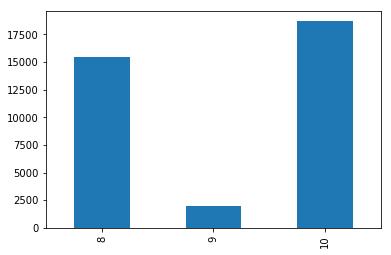

In [119]:
bad_x = Series(badpixels[:, 2])
bad_x_counts = bad_x.value_counts().sort_index()
bad_x_counts.plot(kind='bar')

Bad pixels happen only in 8, 9, and 10 column for this tpf